# Project 2 - Ames Housing Data and Kaggle Challenge

## Problem Statement

We are a group of data scientist in a consulting firm. Our Client is a Real Estate online platform for the buying and selling of properties. They are looking to penetrate into the USA market, starting with the state of Iowa. One feature they are looking to implement on their platform is to allow their users to get an estimated price of their property based on some input features. We are tasked to generate a baseline model in order for them to generate predicted house prices based on the inputs

# PART 1 - Data Cleaning and EDA

## Import and setup

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as stats
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import r2_score
from sklearn.feature_selection import RFE

# Set graph to sns style
sns.set()

In [2]:
# Allow jupyter notebook to display all rows and columns
pd.set_option('display.max_columns', 999)
pd.set_option('display.max_rows', 999)

## Examining Train Data

In [3]:
# Read train csv
train = pd.read_csv('../data/train.csv')

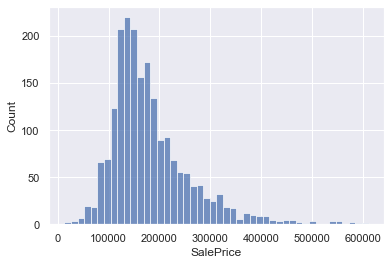

In [4]:
# Overview of the saleprice target that we are predicting
sns.histplot(train['SalePrice']);

* The distribution of `SalePrice` is skewed to the right.

In [5]:
print(train.shape)
train.head()

(2051, 81)


,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


## Explore the data for null values.

In [6]:
# View missing values by percentage and sort by descending
(train.isnull().sum()[train.isnull().sum() > 0] / train.shape[0]*100).sort_values(ascending=False)

Pool QC           99.561190
Misc Feature      96.830814
Alley             93.174061
Fence             80.497318
Fireplace Qu      48.756704
Lot Frontage      16.089712
Garage Yr Blt      5.558264
Garage Cond        5.558264
Garage Qual        5.558264
Garage Finish      5.558264
Garage Type        5.509508
Bsmt Exposure      2.827889
BsmtFin Type 2     2.730375
Bsmt Cond          2.681619
Bsmt Qual          2.681619
BsmtFin Type 1     2.681619
Mas Vnr Area       1.072647
Mas Vnr Type       1.072647
Bsmt Half Bath     0.097513
Bsmt Full Bath     0.097513
Total Bsmt SF      0.048757
Bsmt Unf SF        0.048757
BsmtFin SF 2       0.048757
Garage Cars        0.048757
Garage Area        0.048757
BsmtFin SF 1       0.048757
dtype: float64

In [7]:
# View missing values by count and sort by descending
(train.isnull().sum()[train.isnull().sum()>0]).sort_values(ascending=False)

Pool QC           2042
Misc Feature      1986
Alley             1911
Fence             1651
Fireplace Qu      1000
Lot Frontage       330
Garage Yr Blt      114
Garage Cond        114
Garage Qual        114
Garage Finish      114
Garage Type        113
Bsmt Exposure       58
BsmtFin Type 2      56
Bsmt Cond           55
Bsmt Qual           55
BsmtFin Type 1      55
Mas Vnr Area        22
Mas Vnr Type        22
Bsmt Half Bath       2
Bsmt Full Bath       2
Total Bsmt SF        1
Bsmt Unf SF          1
BsmtFin SF 2         1
Garage Cars          1
Garage Area          1
BsmtFin SF 1         1
dtype: int64

In [8]:
null_counts = train.isnull().sum()
null_counts[null_counts > 0]

Lot Frontage       330
Alley             1911
Mas Vnr Type        22
Mas Vnr Area        22
Bsmt Qual           55
Bsmt Cond           55
Bsmt Exposure       58
BsmtFin Type 1      55
BsmtFin SF 1         1
BsmtFin Type 2      56
BsmtFin SF 2         1
Bsmt Unf SF          1
Total Bsmt SF        1
Bsmt Full Bath       2
Bsmt Half Bath       2
Fireplace Qu      1000
Garage Type        113
Garage Yr Blt      114
Garage Finish      114
Garage Cars          1
Garage Area          1
Garage Qual        114
Garage Cond        114
Pool QC           2042
Fence             1651
Misc Feature      1986
dtype: int64

### Handling Null values

#### Id

In [9]:
# Drop 'Id' as it is a identifier
train.drop('Id',axis=1,inplace=True)

####  PID

In [10]:
# Drop ''pid as it is a identifier
train.drop('PID',axis=1,inplace=True)

####  Lot Frontage (Continuous)

Lot frontage refer to the 'linear feet of street connected to property'. It is unlikely that a property is not connected to any street.The null values will be filled with the median according to the same subclass and lot shape

In [11]:
# convert all null values of lot frontage if ms subclass and lot shape exist
train['Lot Frontage'] = train.groupby(['MS SubClass','Lot Shape'])['Lot Frontage'].transform( lambda x: x.fillna(x.median()))

C:\Users\hoven\Anaconda3\envs\dsi-sg\lib\site-packages\numpy\lib\nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\hoven\Anaconda3\envs\dsi-sg\lib\site-packages\numpy\lib\nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\hoven\Anaconda3\envs\dsi-sg\lib\site-packages\numpy\lib\nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\hoven\Anaconda3\envs\dsi-sg\lib\site-packages\numpy\lib\nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [12]:
train.loc[train['Lot Frontage'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
430,160,FV,NaN,5105,Pave,NaN,IR2,Lvl,AllPub,FR2,Gtl,Somerst,Norm,Norm,TwnhsE,2Story,7,5,2004,2004,Gable,CompShg,MetalSd,MetalSd,None,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,239.0,Unf,0.0,312.0,551.0,GasA,Ex,Y,SBrkr,551,551,0,1102,0.0,0.0,2,1,2,1,Gd,4,Typ,0,NaN,Detchd,2004.0,Unf,2.0,480.0,TA,TA,Y,0,60,0,0,0,0,NaN,NaN,NaN,0,3,2007,WD,148800
1515,150,RL,NaN,1700,Pave,NaN,Reg,HLS,AllPub,Inside,Gtl,ClearCr,Norm,Norm,Twnhs,1.5Fin,7,5,1980,1981,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,397.0,Unf,0.0,33.0,430.0,GasA,TA,Y,SBrkr,880,680,140,1700,1.0,0.0,2,1,2,1,Gd,7,Typ,0,NaN,Basment,1980.0,Fin,1.0,450.0,Gd,TA,Y,188,36,0,0,200,0,NaN,NaN,NaN,0,4,2006,WD,148400
1721,80,RL,NaN,11454,Pave,NaN,IR2,Lvl,AllPub,Corner,Gtl,SawyerW,Norm,Norm,1Fam,SLvl,8,5,1995,1995,Gable,CompShg,VinylSd,VinylSd,BrkFace,302.0,Gd,TA,PConc,Gd,TA,Gd,GLQ,770.0,Unf,0.0,631.0,1401.0,GasA,Ex,Y,SBrkr,1511,0,0,1511,1.0,0.0,2,0,3,1,Gd,6,Typ,1,Fa,Attchd,1995.0,Fin,3.0,811.0,TA,TA,Y,168,42,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,225000
1735,20,RL,NaN,12155,Pave,NaN,IR3,Lvl,AllPub,Inside,Gtl,NAmes,PosN,Norm,1Fam,1Story,6,3,1970,1970,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,LwQ,1237.0,Unf,0.0,420.0,1657.0,GasA,Gd,Y,SBrkr,1657,0,0,1657,0.0,1.0,2,0,3,1,TA,7,Typ,1,TA,Attchd,1970.0,Unf,2.0,484.0,TA,TA,Y,0,0,0,0,147,0,NaN,NaN,NaN,0,3,2007,WD,163500


There are rows where MS subclass or lot shape does not exist. Median of the lot frontage will be assigned to these rows

In [13]:
train['Lot Frontage'].fillna(train['Lot Frontage'].median(),inplace=True)

####  Alley (Nominal)

1911 null values discovered.

In [14]:
train['Alley'].unique()

array([nan, 'Pave', 'Grvl'], dtype=object)

This feature refers to the type of alley access to the property, weather it is gravel, paved or no alley. It is possible that a house may not have access to an alley. Hence the missing values will be assigned 'NA'

In [15]:
train['Alley'].fillna('Na',inplace=True)

In [16]:
# verify there are no missing values
train['Alley'].isnull().sum()

0

#### Mas Vnr Type

Masonry Veneer Type refers to the external wall layer. 

In [17]:
train['Mas Vnr Type'].value_counts()

None       1218
BrkFace     630
Stone       168
BrkCmn       13
Name: Mas Vnr Type, dtype: int64

'None' is a category for this feature. Hence the missing values will be assigned "None"

In [18]:
train['Mas Vnr Type'].fillna('None',inplace=True)

In [19]:
# verify there are no missing values
train['Mas Vnr Type'].isnull().sum()

0

####  Mas Vnr Area

As mentioned above, it is possible to not have Masonry Veneer Type. If that is the case, there could be scenerio where there is no masonary area and mansonary type. If the Mas Vnr Type is "None",  Mas Vnr Area should be 0. 

The missing values will be assigned to 0 and filter any  properties with 'None' value but has a Mas Vnr Area > 0.

In [20]:
train['Mas Vnr Area'].fillna(0.0,inplace=True)

In [21]:
train.loc[(train['Mas Vnr Area']>0) & (train['Mas Vnr Type']=='None')]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
765,90,RL,73.0,18890,Pave,Na,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Feedr,RRAe,Duplex,1.5Fin,5,5,1977,1977,Shed,CompShg,Plywood,Plywood,None,1.0,TA,TA,CBlock,Gd,TA,No,GLQ,498.0,Rec,211.0,652.0,1361.0,GasA,Ex,Y,SBrkr,1361,1259,0,2620,0.0,0.0,2,2,4,2,TA,12,Typ,1,TA,BuiltIn,1977.0,RFn,2.0,600.0,TA,TA,N,155,24,145,0,0,0,NaN,NaN,Gar2,8300,8,2007,WD,190000
810,60,RL,80.0,10400,Pave,Na,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,2Story,6,5,1972,1972,Gable,CompShg,VinylSd,VinylSd,None,288.0,TA,TA,CBlock,TA,TA,No,Rec,247.0,Unf,0.0,485.0,732.0,GasA,Gd,Y,SBrkr,1012,778,0,1790,1.0,0.0,1,2,4,1,TA,8,Min2,1,TA,Attchd,1972.0,RFn,2.0,484.0,TA,TA,Y,148,0,0,0,147,0,NaN,NaN,NaN,0,11,2006,WD,165150
1148,20,RL,70.0,10150,Pave,Na,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,5,1958,1958,Gable,CompShg,Wd Sdng,Wd Sdng,None,1.0,TA,TA,CBlock,TA,TA,No,Rec,456.0,Unf,0.0,456.0,912.0,GasA,Ex,Y,FuseA,912,0,0,912,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1958.0,RFn,1.0,275.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,7,2007,COD,114500
1684,20,RM,52.0,8626,Pave,Na,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,4,6,1956,1956,Gable,CompShg,MetalSd,MetalSd,None,1.0,TA,TA,CBlock,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,Gd,Y,SBrkr,968,0,0,968,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1956.0,Unf,1.0,331.0,Fa,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,104500
1832,60,RL,74.0,10762,Pave,Na,IR1,Lvl,AllPub,CulDSac,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,1999,1999,Gable,CompShg,VinylSd,VinylSd,None,344.0,Gd,TA,PConc,Gd,TA,No,GLQ,694.0,Unf,0.0,284.0,978.0,GasA,Ex,Y,SBrkr,1005,978,0,1983,0.0,0.0,2,1,3,1,Gd,9,Typ,1,TA,Attchd,1999.0,Fin,2.0,490.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,5,2009,WD,225000


In [22]:
train.iloc[[765],25] = train.iloc[[765],25].replace(1.0,0.0)

In [23]:
train.iloc[[810],25] = train.iloc[[810],25].replace(288.0,0.0)

In [24]:
train.iloc[[1148],25] = train.iloc[[1148],25].replace(1.0,0.0)

In [25]:
train.iloc[[1684],25] = train.iloc[[1684],25].replace(1.0,0.0)

In [26]:
train.iloc[[1832],25] = train.iloc[[1832],25].replace(344.0,0.0)

####  Basement Variables

Check if generally the number of properties with no basement is actually 55

**Bsmt Exposure**

In [27]:
train.loc[(train['Bsmt Exposure'].isnull()) & (train['Bsmt Qual'].notnull())]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
1456,60,FV,81.0,10411,Pave,Na,Reg,Lvl,AllPub,Corner,Gtl,Somerst,Norm,Norm,1Fam,2Story,5,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,CBlock,Gd,TA,NaN,Unf,0.0,Unf,0.0,725.0,725.0,GasA,Ex,Y,SBrkr,725,863,0,1588,0.0,0.0,3,0,3,1,Gd,8,Typ,0,NaN,Attchd,2007.0,Unf,2.0,561.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,7,2007,New,212109
1547,20,RL,73.0,8987,Pave,Na,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2005,2006,Gable,CompShg,VinylSd,VinylSd,BrkFace,226.0,Gd,TA,PConc,Gd,TA,NaN,Unf,0.0,Unf,0.0,1595.0,1595.0,GasA,Ex,Y,SBrkr,1595,0,0,1595,0.0,0.0,2,0,2,1,Gd,6,Typ,1,Gd,Attchd,2005.0,RFn,3.0,880.0,TA,TA,Y,144,0,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,221500
1997,60,RL,65.0,14006,Pave,Na,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,144.0,Gd,TA,PConc,Gd,TA,NaN,Unf,0.0,Unf,0.0,936.0,936.0,GasA,Ex,Y,SBrkr,936,840,0,1776,0.0,0.0,2,1,3,1,Gd,7,Typ,1,TA,Attchd,2002.0,RFn,2.0,474.0,TA,TA,Y,144,96,0,0,0,0,NaN,NaN,NaN,0,2,2006,WD,192500


* There are 3 rows for basements without basement exposure
* Null values will be assigned 'No' as there is no basement exposure

In [28]:
train.iloc[[1456,1547,1997],[31]] = train.iloc[[1456,1547,1997],[31]].fillna('No')

In [29]:
# Find the other rows without basement.
train.loc[(train['Bsmt Exposure'].isnull()) & (train['Bsmt Qual'].isnull())].shape

(55, 79)

In [30]:
# Replace remaining missing values with "NA" as no basement
train['Bsmt Exposure'].fillna('Na',inplace=True)

In [31]:
train['Bsmt Exposure'].unique()

array(['No', 'Gd', 'Av', 'Na', 'Mn'], dtype=object)

In [32]:
# Reassigned values with numeric for categorical sorting later
train.replace({'Bsmt Exposure':{'Na':1, 'No':2, 'Mn':3, 'Av':4, 'Gd':5}},inplace=True)

In [33]:
train['Bsmt Exposure'].unique()

array([2, 5, 4, 1, 3], dtype=int64)

**BsmtFin Type 1 (Categorical)**

In [34]:
# verify the number of null values that shows 'No Basement' is 55
train.loc[(train['BsmtFin Type 1'].isnull()) & (train['Bsmt Qual'].isnull())].shape

(55, 79)

In [35]:
# replace missing values with 'Na'
train['BsmtFin Type 1'].fillna('Na',inplace=True)

**BsmtFin SF 1 (Continuous)**

In [36]:
train.loc[train['BsmtFin SF 1'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
1327,20,RM,99.0,5940,Pave,Na,IR1,Lvl,AllPub,FR3,Gtl,BrkSide,Feedr,Norm,1Fam,1Story,4,7,1946,1950,Gable,CompShg,MetalSd,CBlock,None,0.0,TA,TA,PConc,NaN,NaN,1,Na,NaN,NaN,NaN,NaN,NaN,GasA,TA,Y,FuseA,896,0,0,896,NaN,NaN,1,0,2,1,TA,4,Typ,0,NaN,Detchd,1946.0,Unf,1.0,280.0,TA,TA,Y,0,0,0,0,0,0,NaN,MnPrv,NaN,0,4,2008,ConLD,79000


This property does not have a basement. However, the null value should be replaced with 0.0 as this is a continuous variable

In [37]:
train['BsmtFin SF 1'].fillna(0.0,inplace=True)

In [38]:
# verify missing values is filled
train['BsmtFin Type 1'].isnull().sum()

0

**BsmtFin Type 2 (Categorical)**

As there are 56 null values for BsmtFin Type 2, we have to investigate the additional property with null value.

In [39]:
train.loc[(train['BsmtFin Type 2'].isnull()) & (train['Bsmt Qual'].notnull())]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
1147,20,RL,85.0,10655,Pave,Na,IR1,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,8,5,2003,2004,Gable,CompShg,VinylSd,VinylSd,BrkFace,296.0,Gd,TA,PConc,Gd,TA,2,GLQ,1124.0,NaN,479.0,1603.0,3206.0,GasA,Ex,Y,SBrkr,1629,0,0,1629,1.0,0.0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2003.0,RFn,3.0,880.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,10,2009,WD,284000


This property has a basement finished square feet type 2, hence basement finished type 2 cannot be a null value nor "No Basement". In addition, since basement finish type one is 'GLQ', basement finished type 2 cannot be 'GLQ' too. To assign a valid value to basement finished type 2, we will look at the type of basement type 2 finished that is the most popular with the basement quality and basement finished type 1.

In [40]:
train.groupby(['Bsmt Qual','BsmtFin Type 1'])['BsmtFin Type 2'].apply(stats.mode)

Bsmt Qual  BsmtFin Type 1
Ex         ALQ               Unf
           GLQ               Unf
           LwQ               GLQ
           Rec               GLQ
           Unf               Unf
Fa         ALQ               Unf
           BLQ               Unf
           LwQ               Unf
           Rec               Unf
           Unf               Unf
Gd         ALQ               Unf
           BLQ               Unf
           GLQ               Unf
           LwQ               GLQ
           Rec               Unf
           Unf               Unf
Po         Unf               Unf
TA         ALQ               Unf
           BLQ               Unf
           GLQ               Unf
           LwQ               Unf
           Rec               Unf
           Unf               Unf
Name: BsmtFin Type 2, dtype: object

The properties with basements in Ames that has a basement quality of Gd and basement finished type 1 of GLQ has 379 basements that are unfinished. Hence, we will assign unfinished to BsmtFin Type 2 above.

In [41]:
train.iloc[[1147],[34]] = train.iloc[[1147],[34]].fillna('unf')

In [42]:
train['BsmtFin Type 2'].fillna('Na',inplace=True)

**BsmtFin SF 2 (Continuous)**

In [43]:
train.loc[train['BsmtFin SF 2'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
1327,20,RM,99.0,5940,Pave,Na,IR1,Lvl,AllPub,FR3,Gtl,BrkSide,Feedr,Norm,1Fam,1Story,4,7,1946,1950,Gable,CompShg,MetalSd,CBlock,None,0.0,TA,TA,PConc,NaN,NaN,1,Na,0.0,Na,NaN,NaN,NaN,GasA,TA,Y,FuseA,896,0,0,896,NaN,NaN,1,0,2,1,TA,4,Typ,0,NaN,Detchd,1946.0,Unf,1.0,280.0,TA,TA,Y,0,0,0,0,0,0,NaN,MnPrv,NaN,0,4,2008,ConLD,79000


This property does not have a basement. The null value will be be replaced with 0 as this is a continuous variable

In [44]:
train['BsmtFin SF 2'].fillna(0.0,inplace=True)

**Bsmt Unf SF (Continuous)**

In [45]:
train.loc[train['Bsmt Unf SF'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
1327,20,RM,99.0,5940,Pave,Na,IR1,Lvl,AllPub,FR3,Gtl,BrkSide,Feedr,Norm,1Fam,1Story,4,7,1946,1950,Gable,CompShg,MetalSd,CBlock,None,0.0,TA,TA,PConc,NaN,NaN,1,Na,0.0,Na,0.0,NaN,NaN,GasA,TA,Y,FuseA,896,0,0,896,NaN,NaN,1,0,2,1,TA,4,Typ,0,NaN,Detchd,1946.0,Unf,1.0,280.0,TA,TA,Y,0,0,0,0,0,0,NaN,MnPrv,NaN,0,4,2008,ConLD,79000


This property does not have a basement. The null value will be be replaced with 0 as this is a continuous variable

In [46]:
train['Bsmt Unf SF'].fillna(0.0,inplace=True)

**Total Bsmt SF (Continuous)**

In [47]:
train.loc[train['Total Bsmt SF'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
1327,20,RM,99.0,5940,Pave,Na,IR1,Lvl,AllPub,FR3,Gtl,BrkSide,Feedr,Norm,1Fam,1Story,4,7,1946,1950,Gable,CompShg,MetalSd,CBlock,None,0.0,TA,TA,PConc,NaN,NaN,1,Na,0.0,Na,0.0,0.0,NaN,GasA,TA,Y,FuseA,896,0,0,896,NaN,NaN,1,0,2,1,TA,4,Typ,0,NaN,Detchd,1946.0,Unf,1.0,280.0,TA,TA,Y,0,0,0,0,0,0,NaN,MnPrv,NaN,0,4,2008,ConLD,79000


This property does not have a basement. However, the null value should be replaced with 0.0 as this is a continuous variable

In [48]:
train['Total Bsmt SF'].fillna(0.0,inplace=True)

**Bsmt Full Bath (Categorical)**

In [49]:
train.loc[train['Bsmt Full Bath'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
616,20,RL,123.0,47007,Pave,Na,IR1,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,7,1959,1996,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,Slab,NaN,NaN,1,Na,0.0,Na,0.0,0.0,0.0,GasA,TA,Y,SBrkr,3820,0,0,3820,NaN,NaN,3,1,5,1,Ex,11,Typ,2,Gd,Attchd,1959.0,Unf,2.0,624.0,TA,TA,Y,0,372,0,0,0,0,NaN,NaN,NaN,0,7,2008,WD,284700
1327,20,RM,99.0,5940,Pave,Na,IR1,Lvl,AllPub,FR3,Gtl,BrkSide,Feedr,Norm,1Fam,1Story,4,7,1946,1950,Gable,CompShg,MetalSd,CBlock,None,0.0,TA,TA,PConc,NaN,NaN,1,Na,0.0,Na,0.0,0.0,0.0,GasA,TA,Y,FuseA,896,0,0,896,NaN,NaN,1,0,2,1,TA,4,Typ,0,NaN,Detchd,1946.0,Unf,1.0,280.0,TA,TA,Y,0,0,0,0,0,0,NaN,MnPrv,NaN,0,4,2008,ConLD,79000


These 2 properties do not have a basement. However, the null value should be replaced with 0.0 as this is a continuous variable

In [50]:
train['Bsmt Full Bath'].fillna(0.0,inplace=True)

**Bsmt Half Bath (Categorical)**

In [51]:
train.loc[train['Bsmt Half Bath'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
616,20,RL,123.0,47007,Pave,Na,IR1,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,7,1959,1996,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,Slab,NaN,NaN,1,Na,0.0,Na,0.0,0.0,0.0,GasA,TA,Y,SBrkr,3820,0,0,3820,0.0,NaN,3,1,5,1,Ex,11,Typ,2,Gd,Attchd,1959.0,Unf,2.0,624.0,TA,TA,Y,0,372,0,0,0,0,NaN,NaN,NaN,0,7,2008,WD,284700
1327,20,RM,99.0,5940,Pave,Na,IR1,Lvl,AllPub,FR3,Gtl,BrkSide,Feedr,Norm,1Fam,1Story,4,7,1946,1950,Gable,CompShg,MetalSd,CBlock,None,0.0,TA,TA,PConc,NaN,NaN,1,Na,0.0,Na,0.0,0.0,0.0,GasA,TA,Y,FuseA,896,0,0,896,0.0,NaN,1,0,2,1,TA,4,Typ,0,NaN,Detchd,1946.0,Unf,1.0,280.0,TA,TA,Y,0,0,0,0,0,0,NaN,MnPrv,NaN,0,4,2008,ConLD,79000


These property do not have a basement and the basement half bath can be filled with 0

In [52]:
train['Bsmt Half Bath'].fillna(0.0,inplace=True)

**Bsmt Cond (Ordinal)**

In [53]:
train['Bsmt Cond'].isnull().sum()

55

There are 55 properties with no basement. The null values will be replaced with 'Na'.

In [54]:
train['Bsmt Cond'].fillna('Na',inplace=True)

In [55]:
train['Bsmt Cond'].unique()

array(['TA', 'Gd', 'Na', 'Fa', 'Po', 'Ex'], dtype=object)

In [56]:
# transform to ordinal variables
train.replace({'Bsmt Cond':{'Na':1,'Po':2,'Fa':3,'TA':4,'Gd':5,'Ex':6}},inplace=True)

**Bsmt Qual (Ordinal)**

There are 55 properties with no basement, hence, the null values will be replaced with 'Na'.

In [57]:
train['Bsmt Qual'].fillna('Na',inplace=True)

In [58]:
train['Bsmt Qual'].unique()

array(['TA', 'Gd', 'Fa', 'Na', 'Ex', 'Po'], dtype=object)

In [59]:
# transform to ordinal variables
train.replace({'Bsmt Qual':{'Na':1,'Po':2,'Fa':3,'TA':4,'Gd':5,'Ex':6}},inplace=True)

**Fireplace Qu (Categorical)**

In [60]:
# confirm that all null values are due to the property having no fireplace.
train.loc[(train['Fireplace Qu'].isnull()) & (train['Fireplaces'] == 0)].shape

(1000, 79)

In [61]:
# replace all null values with 'Na' as the properties does not have a fireplace
train['Fireplace Qu'].fillna('Na',inplace=True)

In [62]:
train['Fireplace Qu'].unique()

array(['Na', 'TA', 'Gd', 'Po', 'Ex', 'Fa'], dtype=object)

In [63]:
# transform to ordinal variable
train.replace({'Fireplace Qu': {'Na':1, 'Po':2, 'Fa':3, 'TA':4, 'Gd':5, 'Ex':6}},inplace=True)

#### Garage Variables

**Garage Type**

Of all the related garage variables, Garage Type has 113 null values, while Garage Yr Blt, Garage Finish, Garage Qual and Garage Cond have 114 null values.

Investigate if 113 or 114 properties does not have a basement.

**Garage Type**

In [64]:
train.loc[(train['Garage Type'].notnull()) & (train['Garage Qual'].isnull())]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
1712,70,RM,50.0,9060,Pave,Na,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,2Story,5,6,1923,1999,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,BrkTil,5,4,2,ALQ,548.0,Unf,0.0,311.0,859.0,GasA,Ex,Y,SBrkr,942,886,0,1828,0.0,0.0,2,0,3,1,Gd,6,Typ,0,1,Detchd,NaN,NaN,NaN,NaN,NaN,NaN,Y,174,0,212,0,0,0,NaN,MnPrv,NaN,0,3,2007,WD,150909


In [65]:
train.groupby(['MS SubClass','Garage Type'])[['Garage Yr Blt','Garage Finish','Garage Cars','Garage Area','Garage Qual','Garage Cond']].apply(stats.mode)

MS SubClass  Garage Type
20           2Types         Garage Yr Blt
             Attchd         Garage Yr Blt
             Basment        Garage Yr Blt
             BuiltIn        Garage Yr Blt
             CarPort        Garage Yr Blt
             Detchd         Garage Yr Blt
30           Attchd         Garage Yr Blt
             Basment        Garage Yr Blt
             BuiltIn        Garage Yr Blt
             Detchd         Garage Yr Blt
40           Detchd         Garage Yr Blt
45           Attchd         Garage Yr Blt
             Detchd         Garage Yr Blt
50           2Types         Garage Yr Blt
             Attchd         Garage Yr Blt
             BuiltIn        Garage Yr Blt
             CarPort        Garage Yr Blt
             Detchd         Garage Yr Blt
60           2Types         Garage Yr Blt
             Attchd         Garage Yr Blt
             BuiltIn        Garage Yr Blt
             CarPort        Garage Yr Blt
             Detchd         Garage Yr Blt
70       

In [66]:
# confirm if the number of MS SubClass '70' and Garage Type 'Detchd' are not too little
train.loc[(train['MS SubClass'] == 70) & (train['Garage Type'] == 'Detchd')].shape

(62, 79)

There are at least 62/2051 or 3% of properties with the same MS SubClass '70' and Garage Type 'Detchd'. Hence the values will be assigned as such:

- Garage Yr Blt: 1930.0
- Garage Finish: Unf
- Garage Cars: 1.0
- Garage Area: 180.0
- Garage Qual: TA
- Garage Cond: TA

In [67]:
train.iloc[[1712],[60]] = train.iloc[[1712],[60]].fillna(1.0)

In [68]:
train.iloc[[1712],[61]] = train.iloc[[1712],[61]].fillna('180.0')

In [69]:
train.iloc[[1712],[62]] = train.iloc[[1712],[62]].fillna('TA')

In [70]:
train.iloc[[1712],[63]] = train.iloc[[1712],[63]].fillna('TA')

In [71]:
train.iloc[[1712],[59]] = train.iloc[[1712],[59]].fillna('Unf')

In [72]:
train.iloc[[1712],[58]] = train.iloc[[1712],[58]].fillna('1930.0')

There are 113 rows without garage. These will be assigned 'Na' to all null values.

In [73]:
train['Garage Type'].fillna('Na',inplace=True)

**Garage Yr Blt**

In [74]:
train['Garage Yr Blt'].fillna(0.0,inplace=True)

In [75]:
# convert data type for garage area from object to float
train['Garage Yr Blt'] = train['Garage Yr Blt'].astype(float)

**Garage Finish**

In [76]:
train['Garage Finish'].fillna('Na',inplace=True)

**Garage Qual**

In [77]:
train['Garage Qual'].fillna('Na',inplace=True)

In [78]:
train['Garage Qual'].unique()

array(['TA', 'Fa', 'Na', 'Gd', 'Ex', 'Po'], dtype=object)

In [79]:
# transform to ordinal variable
train.replace({'Garage Qual': {'Na':1, 'Po':2, 'Fa':3, 'TA':4, 'Gd':5, 'Ex':6}},inplace=True)

**Garage Cond**

In [80]:
train['Garage Cond'].fillna('Na',inplace=True)

In [81]:
train['Garage Cond'].unique()

array(['TA', 'Fa', 'Na', 'Po', 'Gd', 'Ex'], dtype=object)

In [82]:
# transform to ordinal variable
train.replace({'Garage Cond': {'Na':1, 'Po':2, 'Fa':3, 'TA':4, 'Gd':5, 'Ex':6}},inplace=True)

**Garage Area**

In [83]:
# convert data type for garage area from object to float
train['Garage Area'] = train['Garage Area'].astype(float)

#### Pool QC

In [84]:
# verify that with Pool Area to confirm the missing values are due to the property having No Pool
train.loc[(train['Pool QC'].isnull()) & (train['Pool Area'] != 0)].shape

(0, 79)

In [85]:
train['Pool QC'].fillna('Na',inplace=True)

In [86]:
train['Pool QC'].unique()

array(['Na', 'Fa', 'Gd', 'Ex', 'TA'], dtype=object)

In [87]:
# transform to ordinal variable
train.replace({'Pool QC': {'Na':1, 'Fa':2, 'TA':3, 'Gd':4,'Ex':5}},inplace=True)

#### Fence

In [88]:
train['Fence'].fillna('Na',inplace=True)

#### Misc Feature

In [89]:
# Misc Feature will be dropped as there are too many combination, as well as the high number of missing values
train.drop(['Misc Feature'], axis=1, inplace=True)

In [90]:
train.select_dtypes(include=['object']).columns

Index(['MS Zoning', 'Street', 'Alley', 'Lot Shape', 'Land Contour',
       'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl',
       'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Exter Qual',
       'Exter Cond', 'Foundation', 'BsmtFin Type 1', 'BsmtFin Type 2',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', 'Kitchen Qual',
       'Functional', 'Garage Type', 'Garage Finish', 'Paved Drive', 'Fence',
       'Sale Type'],
      dtype='object')

#### Exter Qual

In [91]:
train['Exter Qual'].unique()

array(['Gd', 'TA', 'Ex', 'Fa'], dtype=object)

In [92]:
# transform to ordinal variable
train.replace({'Exter Qual': {'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}},inplace=True)

#### Exter Cond

In [93]:
train['Exter Cond'].unique()

array(['TA', 'Gd', 'Fa', 'Ex', 'Po'], dtype=object)

In [94]:
train.replace({'Exter Cond': {'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}},inplace=True)

#### Heating QC

In [95]:
train['Heating QC'].unique()

array(['Ex', 'TA', 'Gd', 'Fa', 'Po'], dtype=object)

In [96]:
# transform to ordinal variables
train.replace({'Heating QC': {'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}},inplace=True)

####  Kitchen Qual

In [97]:
train['Kitchen Qual'].unique()

array(['Gd', 'TA', 'Fa', 'Ex'], dtype=object)

In [98]:
train.replace({'Kitchen Qual': {'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}},inplace=True)

####  MS Zoning

In [99]:
train.replace({'MS Zoning': {'C (all)':'C','A (agr)':'A','I (all)':'I'}},inplace=True)

In [100]:
# Verify datatype
train.dtypes

MS SubClass          int64
MS Zoning           object
Lot Frontage       float64
Lot Area             int64
Street              object
Alley               object
Lot Shape           object
Land Contour        object
Utilities           object
Lot Config          object
Land Slope          object
Neighborhood        object
Condition 1         object
Condition 2         object
Bldg Type           object
House Style         object
Overall Qual         int64
Overall Cond         int64
Year Built           int64
Year Remod/Add       int64
Roof Style          object
Roof Matl           object
Exterior 1st        object
Exterior 2nd        object
Mas Vnr Type        object
Mas Vnr Area       float64
Exter Qual           int64
Exter Cond           int64
Foundation          object
Bsmt Qual            int64
Bsmt Cond            int64
Bsmt Exposure        int64
BsmtFin Type 1      object
BsmtFin SF 1       float64
BsmtFin Type 2      object
BsmtFin SF 2       float64
Bsmt Unf SF        float64
T

## Verify Null values are filled

In [101]:
train.isnull().sum()

MS SubClass        0
MS Zoning          0
Lot Frontage       0
Lot Area           0
Street             0
Alley              0
Lot Shape          0
Land Contour       0
Utilities          0
Lot Config         0
Land Slope         0
Neighborhood       0
Condition 1        0
Condition 2        0
Bldg Type          0
House Style        0
Overall Qual       0
Overall Cond       0
Year Built         0
Year Remod/Add     0
Roof Style         0
Roof Matl          0
Exterior 1st       0
Exterior 2nd       0
Mas Vnr Type       0
Mas Vnr Area       0
Exter Qual         0
Exter Cond         0
Foundation         0
Bsmt Qual          0
Bsmt Cond          0
Bsmt Exposure      0
BsmtFin Type 1     0
BsmtFin SF 1       0
BsmtFin Type 2     0
BsmtFin SF 2       0
Bsmt Unf SF        0
Total Bsmt SF      0
Heating            0
Heating QC         0
Central Air        0
Electrical         0
1st Flr SF         0
2nd Flr SF         0
Low Qual Fin SF    0
Gr Liv Area        0
Bsmt Full Bath     0
Bsmt Half Bat

## Export cleaned data

In [ ]:
# export file
train.to_csv('../data/train_cleaned.csv',index=False)